Files already downloaded and verified
Files already downloaded and verified


<IPython.core.display.Javascript object>


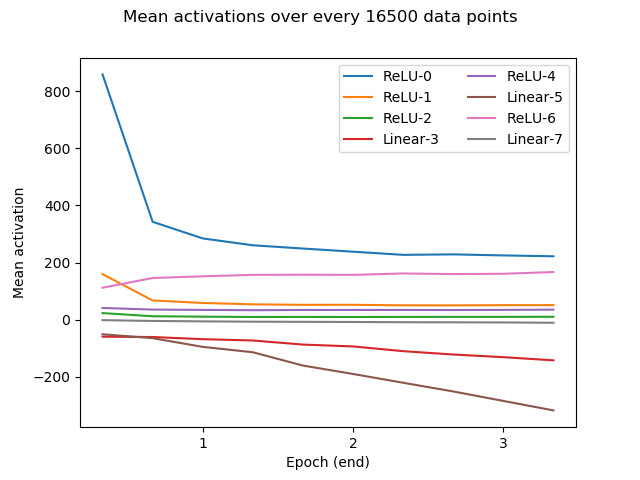

Data size: 50000
Batches per epoch: 391
Number of classes: 10
Data shape: (32, 32, 3)
Using Adam optimizer
Starting epoch     1 of  1000
Starting epoch     2 of  1000
Starting epoch     3 of  1000
Starting epoch     4 of  1000


KeyboardInterrupt: 

In [3]:
%matplotlib notebook
import sys; sys.path.insert(0, '..')
from main import _load_dataset, Trainer
from torch.utils.data import DataLoader
import torch.nn as nn
from visualization import MeanActivationHandler

dataset_str = 'CIFAR10'
model_str = 'AlexNetMini'
batch_size = 128

dataset_train, dataset_test = _load_dataset(dataset_str)
N_train                     = len(dataset_train.dataset)
batches_per_epoch           = int(N_train / batch_size + 0.5)
activation_handler          = MeanActivationHandler(int(N_train * 0.33))   # step every 33%

print(f'Data size: {N_train}')
print(f'Batches per epoch: {batches_per_epoch}')

trainer = Trainer(dataset_train, batch_size=batch_size)
trainer.supervise(nn.ReLU, nn.Linear)
trainer.add_model(model_str)
trainer.add_handlers(activation_handler)
trainer.optimize(name='Adam')

epochs = 1000
for e in range(epochs):
    print(f'Starting epoch {e+1:5d} of {epochs:5d}')
    for batch_idx in range(batches_per_epoch):
        trainer.train()